# By Mohamed Hamdy

### Description 

>> The dataset is a CSV file consists of 200 rows and 6 columns.
>> 4 of these features are categorical features including the output, and two numrical features.
>> The output is the drug type used.
>> We are going to use one hot coding technique for the categorical features before creating our model.
>> The final output is multinomial classification.

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, log_loss, accuracy_score,confusion_matrix, f1_score,plot_confusion_matrix
from sklearn.model_selection import cross_val_score

### Loading Data

In [5]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

##### Drug Y is the most dominant in the dataset followed by Drug X

In [6]:
df.shape

(200, 6)

### Wrangling Dataset

In [6]:
# Renaming Drug column
df['Drug2'] = df['Drug'] .map({'DrugY':'y','drugX':'x','drugA':'a','drugB':'b','drugC':'c'})
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug2
0,23,F,HIGH,HIGH,25.355,DrugY,y
1,47,M,LOW,HIGH,13.093,drugC,c
2,47,M,LOW,HIGH,10.114,drugC,c
3,28,F,NORMAL,HIGH,7.798,drugX,x
4,61,F,LOW,HIGH,18.043,DrugY,y


In [7]:
df.drop(['Drug'],axis=1,inplace=True)

In [8]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug2
0,23,F,HIGH,HIGH,25.355,y
1,47,M,LOW,HIGH,13.093,c
2,47,M,LOW,HIGH,10.114,c
3,28,F,NORMAL,HIGH,7.798,x
4,61,F,LOW,HIGH,18.043,y


In [9]:
# Checjing if any null values 
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug2          0
dtype: int64

In [10]:
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


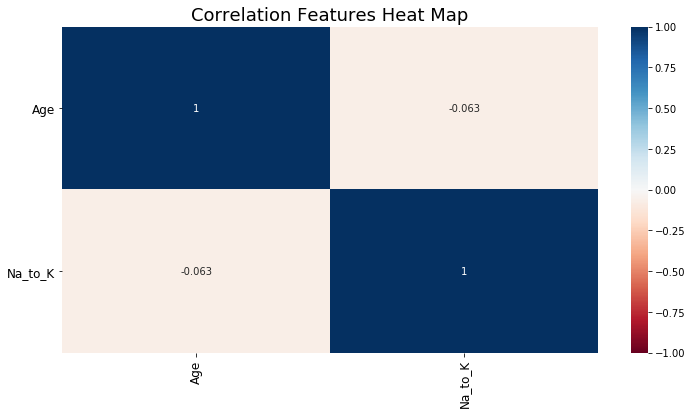

In [11]:
plt.figure(figsize=(12,6))
s = sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='RdBu')
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize = 12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize = 12)
plt.title('Correlation Features Heat Map',fontsize=18);

In [248]:
# Checking dtypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug2        200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [357]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug2
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,y
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


#### We can tell from the describe method that we have 3 unique values for Bp, 2 unique values for Cholestrol, and  5 drugs.

In [12]:
age_drug = df.groupby(['Drug2']).mean().reset_index().sort_values(by='Age',ascending=False)
age_drug.head()

,Drug2,Age,Na_to_K
1,b,62.500000,11.524375
3,x,44.018519,10.650556
4,y,43.747253,22.374780
2,c,42.500000,10.633750
0,a,35.869565,10.918783


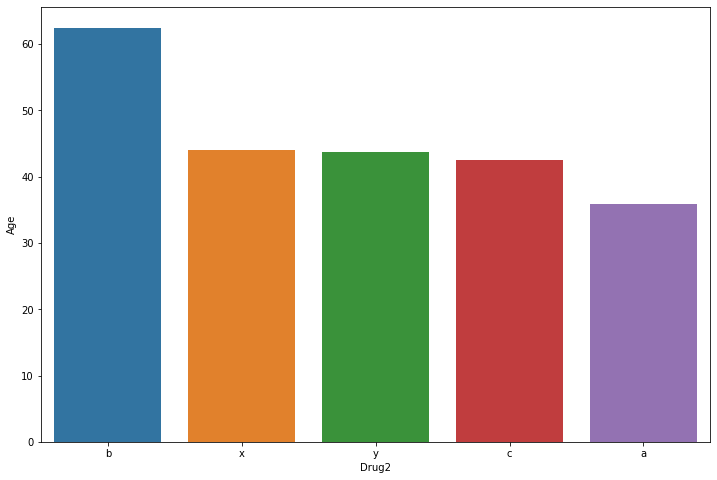

In [13]:
# plotting drug type and age
plt.figure(figsize=(12,8))
sns.barplot(data=age_drug,x='Drug2',y='Age');

##### we can notice from this barplot that average age using drug (B) is the highest [62 years old] , and drug(A) used by the least age average[37 Years old] among dataset  

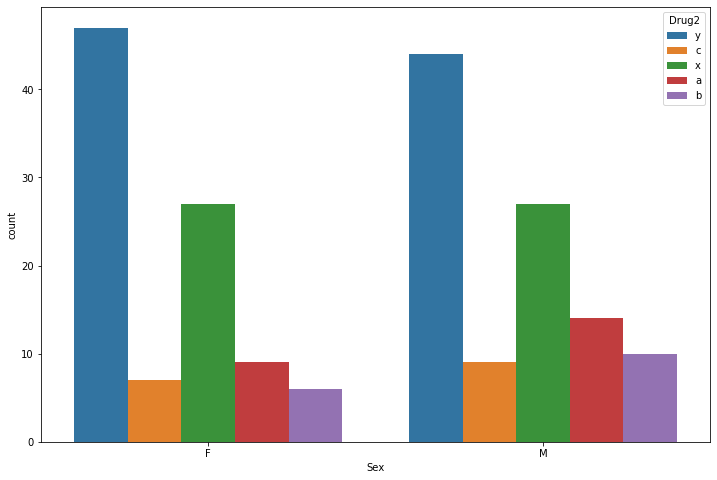

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Sex',hue='Drug2');

##### this plot shows number of each females and males usage for each drug, and we can see that Y and X drug are the most used for both M&F, because Y and X are the most dominant.However, Males count using drug A & B are higher than Females using the same drug.


In [23]:
count_drug = pd.DataFrame(df['Drug2'].value_counts()).reset_index()
count_drug 

,index,Drug2
0,y,91
1,x,54
2,a,23
3,c,16
4,b,16


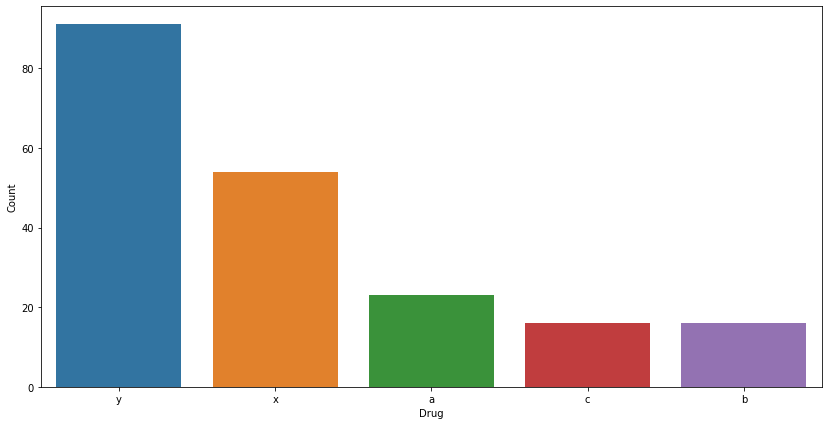

In [24]:
plt.figure(figsize=(14,7))
sns.barplot(data = count_drug ,x='index',y='Drug2')
plt.xlabel('Drug')
plt.ylabel('Count');

##### Y drug is the most dominant drug in the dataset followed by X drug, and Drug B is the least dominant with almost 20 times usage

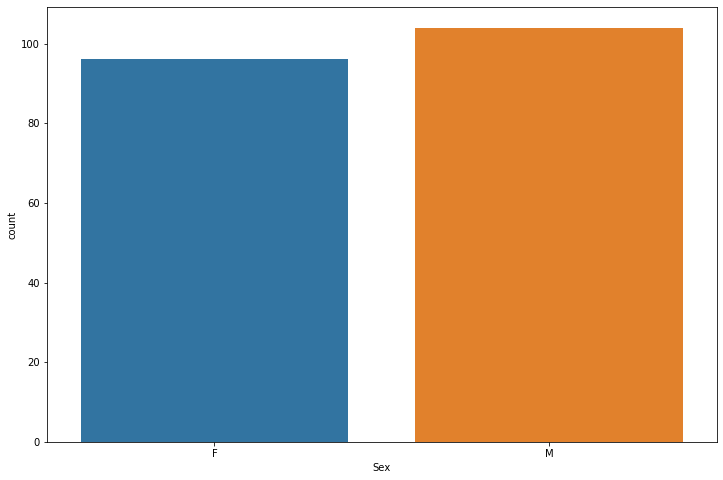

In [254]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Sex');

In [27]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

#### Male proportion slightly higher than female in the dataset 

In [37]:
bp_age = df.groupby('BP')['Age'].mean().reset_index().sort_values(by='Age',ascending=False)
bp_age

,BP,Age
1,LOW,47.031250
2,NORMAL,44.084746
0,HIGH,42.233766


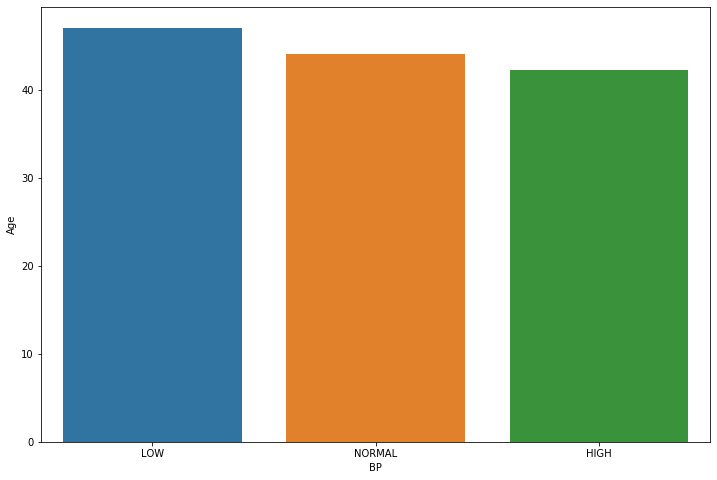

In [38]:
# plotting BP against the average Age 
plt.figure(figsize=(12,8))
sns.barplot(data=bp_age, x='BP',y='Age');

##### We can see that the patients with low blood pressure are the patients with higher age average [47 years old], while high blood pressure patients are the patients with lowest age average [almost 40 years old]

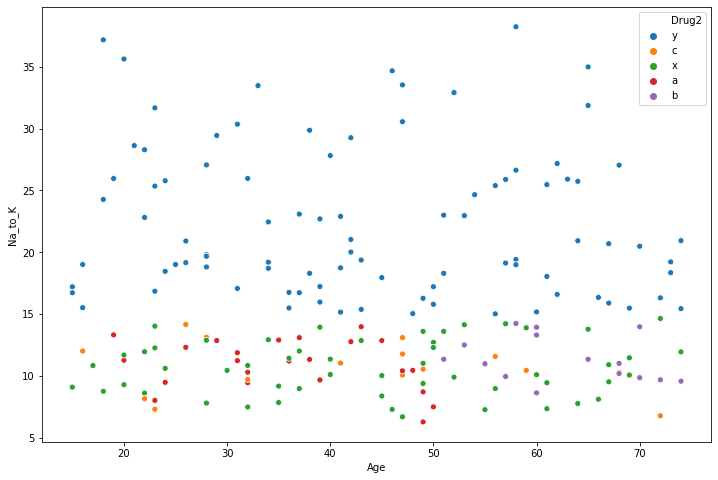

In [39]:
 # Scatter plot between Age and Na to K ratio
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Age',y='Na_to_K',hue='Drug2');

In [258]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug2
0,23,F,HIGH,HIGH,25.355,y
1,47,M,LOW,HIGH,13.093,c
2,47,M,LOW,HIGH,10.114,c
3,28,F,NORMAL,HIGH,7.798,x
4,61,F,LOW,HIGH,18.043,y


In [259]:
bp_df= df.groupby([df['BP'],df['Drug2']])['Sex'].count().unstack(level=1)
bp_df

Drug2,a,b,c,x,y
BP,,,,,
HIGH,23.0,16.0,NaN,NaN,38.0
LOW,NaN,NaN,16.0,18.0,30.0
NORMAL,NaN,NaN,NaN,36.0,23.0


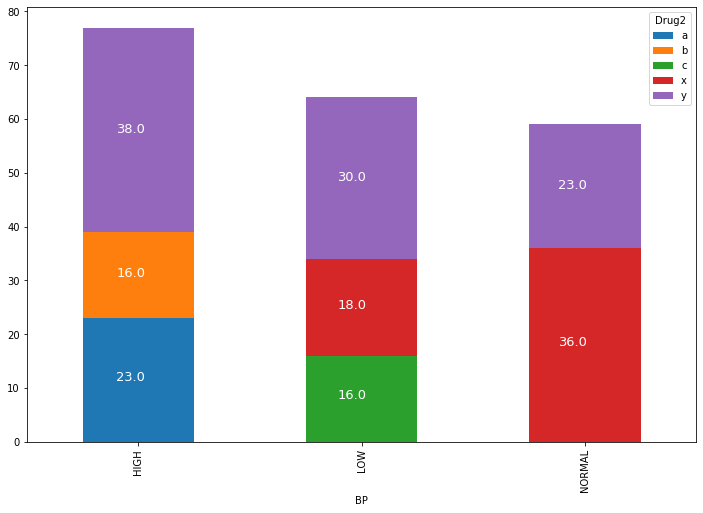

In [260]:
ax = bp_df.plot(kind='bar',stacked=True,figsize=(12,8))
for p in ax.patches:
        values = str(round(p.get_height(),1)) 
        if values == '0.0':
            continue
        ax.annotate(values,((p.get_x() + p.get_width()/2)*0.99-0.1,(p.get_y() + p.get_height()/2)*0.99),color='white',
        size=13)

##### With normal BP the most used drugs are X & Y respectively, with high BP Drug B is involved, and with Low BP Drug C is involved
##### Drug X is not used for High blood pressure patients 
##### Drug X most used for Normal blood pressure patients
##### Drug C used for High blood pressure patients

In [373]:
ch_df= df.groupby([df['Cholesterol'],df['Drug2']])['BP'].count().unstack(level=1)
ch_df

Drug2,a,b,c,x,y
Cholesterol,,,,,
HIGH,12.0,8.0,16.0,20.0,47.0
NORMAL,11.0,8.0,NaN,34.0,44.0


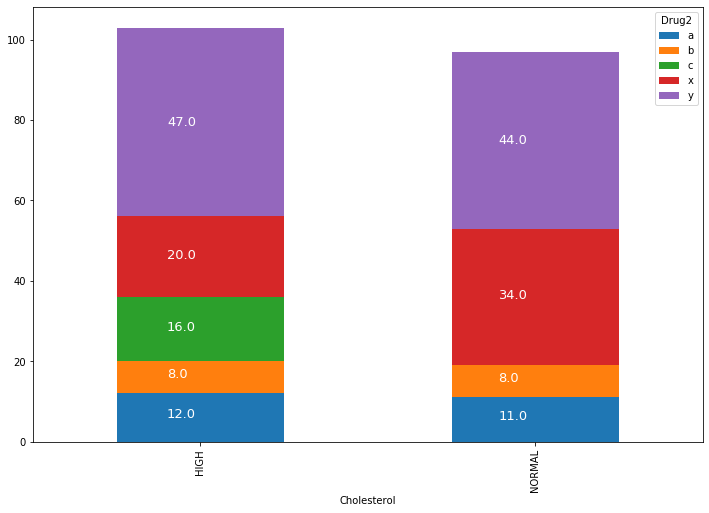

In [262]:
ax = ch_df.plot(kind='bar',stacked=True,figsize=(12,8))
for p in ax.patches:
        values = str(round(p.get_height(),1)) 
        if values == '0.0':
            continue
        ax.annotate(values,((p.get_x() + p.get_width()/2)*0.99-0.1,(p.get_y() + p.get_height()/2)*0.99),color='white',
        size=13)


##### We can see that Drug C is used for the high Cholesterol patients besides all the other Drugs with different percentages 

In [263]:
sex_df= df.groupby([df['Sex'],df['Drug2']])['Sex'].count().unstack(level=1)
sex_df

Drug2,a,b,c,x,y
Sex,,,,,
F,9,6,7,27,47
M,14,10,9,27,44


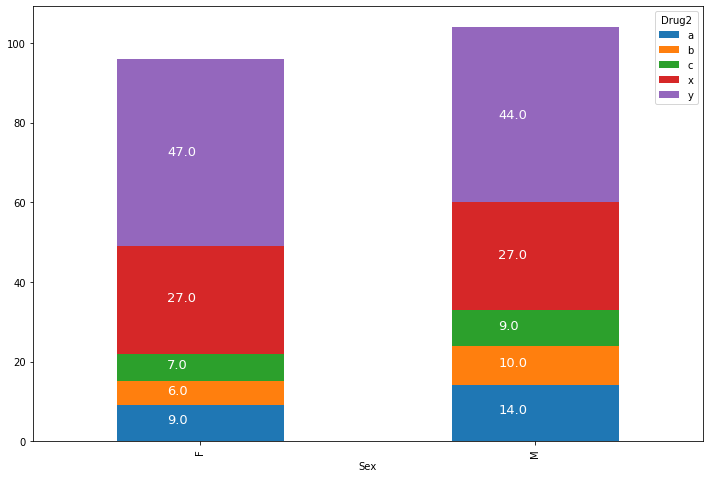

In [264]:
ax = sex_df.plot(kind='bar',stacked=True,figsize=(12,8))
for p in ax.patches:
        values = str(round(p.get_height(),1)) 
        if values == '0.0':
            continue
        ax.annotate(values,((p.get_x() + p.get_width()/2)*0.99-0.1,(p.get_y() + p.get_height()/2)*0.99),color='white',
        size=13)

##### We can confirm from this plot that Males using Drug A more than Females, with slightly different usage for the rest of drugs 

In [265]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug2
0,23,F,HIGH,HIGH,25.355,y
1,47,M,LOW,HIGH,13.093,c
2,47,M,LOW,HIGH,10.114,c
3,28,F,NORMAL,HIGH,7.798,x
4,61,F,LOW,HIGH,18.043,y


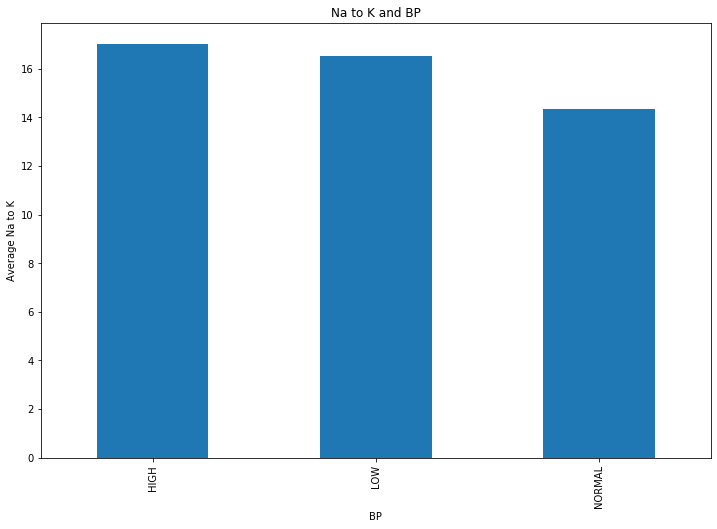

In [266]:
# plotting the relation between Na to K and BP
df_bp_na = df['Na_to_K'].groupby(df['BP']).mean()
df_bp_na.plot(kind='bar',figsize=(12,8)) 
plt.ylabel('Average Na to K')
plt.title('Na to K and BP');

##### Normal BP has the lowest average of NA to K, and high BP has the highest average 

In [44]:
df_ch_na = df['Na_to_K'].groupby(df['Cholesterol']).mean()
df_ch_na

Cholesterol
HIGH      16.014553
NORMAL    16.158742
Name: Na_to_K, dtype: float64

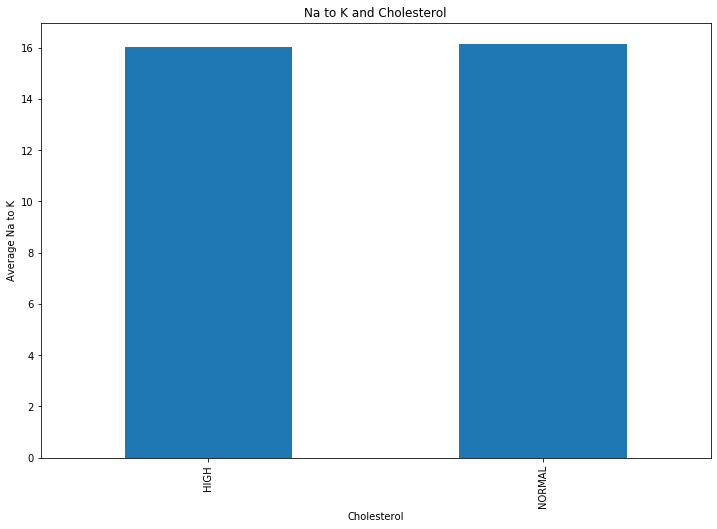

In [267]:
df_ch_na = df['Na_to_K'].groupby(df['Cholesterol']).mean()
df_ch_na.plot(kind='bar',figsize=(12,8)) 
plt.ylabel('Average Na to K')
plt.title('Na to K and Cholesterol');

##### Normal Cholesterol patients have slightly higher average Na-To-K, or almost the same average Na to K of High Cholestrol patients 

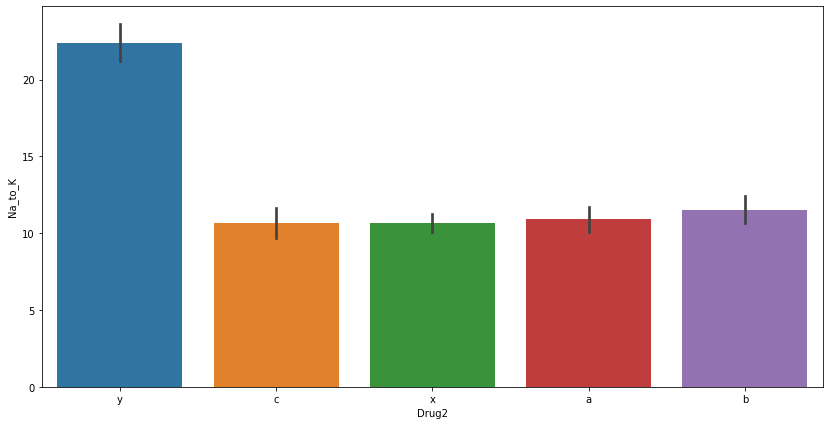

In [859]:
plt.figure(figsize=(14,7))
sns.barplot(data =df ,x='Drug2',y='Na_to_K');

##### Drug Y is used for patients whose Na to K average is higher than 20, other drugs used for patients whose Na to K average below 15

## Feature Engineering 

In [14]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug2
0,23,F,HIGH,HIGH,25.355,y
1,47,M,LOW,HIGH,13.093,c
2,47,M,LOW,HIGH,10.114,c
3,28,F,NORMAL,HIGH,7.798,x
4,61,F,LOW,HIGH,18.043,y


In [15]:
df2 = pd.get_dummies(df,columns=['Sex','BP','Cholesterol'])

In [16]:
df2.head()

,Age,Na_to_K,Drug2,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,y,1,0,1,0,0,1,0
1,47,13.093,c,0,1,0,1,0,1,0
2,47,10.114,c,0,1,0,1,0,1,0
3,28,7.798,x,1,0,0,0,1,1,0
4,61,18.043,y,1,0,0,1,0,1,0


In [17]:
#df2['Drug2']=df2['Drug2'].map({'y':0,'x':1,'c':2,'a':3,'b':4})

In [18]:
X = df2.drop('Drug2',axis=1)
Y = df2['Drug2']

In [19]:
X.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [20]:
Y.head()

0    y
1    c
2    c
3    x
4    y
Name: Drug2, dtype: object

In [21]:
scale = StandardScaler()

In [22]:
scaled_x = scale.fit_transform(X)

### Logistic Regression 


In [23]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,Y,test_size=0.2,random_state=12)

In [24]:
model_log = LogisticRegression(solver='sag',multi_class='multinomial',max_iter=300)
model_log.fit(x_train,y_train)

LogisticRegression(max_iter=300, multi_class='multinomial', solver='sag')

In [25]:
y_hat=model_log.predict(x_test)

In [26]:
model_log.score(x_test,y_test)

0.9

In [27]:
acc_log = accuracy_score(y_test,y_hat)
acc_log

0.9

In [28]:
model_log.predict_proba(x_test)[:,1].round(2)

array([0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.28, 0.85, 0.03, 0.03, 0.34, 0.  , 0.  ,
       0.27, 0.  , 0.03, 0.01, 0.02, 0.  , 0.88, 0.59, 0.  , 0.07, 0.  ,
       0.  , 0.01, 0.08, 0.03, 0.  , 0.  , 0.  ])

In [29]:
print('The Logistic Regression Accuracy is ',acc_log*100,'%')

The Logistic Regression Accuracy is  90.0 %


# Decision Tree 

In [30]:
model_tree = DecisionTreeClassifier(criterion='gini')
model_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
y_train_pred = model_tree.predict(x_train)
y_test_pred = model_tree.predict(x_test)

train_acc = accuracy_score(y_train,y_train_pred)
test_acc_tree = accuracy_score(y_test,y_test_pred)
train_acc, test_acc_tree
print('The Training Accuracy Score is', train_acc)
print('The Model Accuracy Score is', test_acc_tree)

The Training Accuracy Score is 1.0
The Model Accuracy Score is 0.975


In [32]:
print ('The Descision Tree Accuracy is',test_acc_tree*100,'%')

The Descision Tree Accuracy is 97.5 %


##### From the train and test accuracy score we can tell that the model is a little bit overfitted , with test accuracy 97.5%

In [33]:
df2.head()

,Age,Na_to_K,Drug2,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,y,1,0,1,0,0,1,0
1,47,13.093,c,0,1,0,1,0,1,0
2,47,10.114,c,0,1,0,1,0,1,0
3,28,7.798,x,1,0,0,0,1,1,0
4,61,18.043,y,1,0,0,1,0,1,0


In [34]:
model_tree.tree_.node_count

11

In [35]:
model_tree.feature_importances_

array([0.13092269, 0.47788283, 0.        , 0.        , 0.21325168,
       0.        , 0.06987962, 0.        , 0.10806318])

##### Obviously Na to K feature is the most significant factor controlling which drug to use followed by BP

In [36]:
children_left = model_tree.tree_.children_left
children_right =model_tree.tree_.children_right
children_left, children_right

(array([ 1,  2,  3,  4, -1, -1, -1,  8, -1, -1, -1], dtype=int64),
 array([10,  7,  6,  5, -1, -1, -1,  9, -1, -1, -1], dtype=int64))

In [37]:
feature = model_tree.tree_.feature
threshold = model_tree.tree_.threshold
feature
threshold

array([-0.17430019,  0.23633602,  0.44951922,  0.0300135 , -2.        ,
       -2.        , -2.        ,  0.43537799, -2.        , -2.        ,
       -2.        ])

In [38]:
print('Training score is ', train_acc)
print('Test score is ', test_acc_tree)

Training score is  1.0
Test score is  0.975


In [89]:
df2.head()

,Age,Na_to_K,Drug2,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,y,1,0,1,0,0,1,0
1,47,13.093,c,0,1,0,1,0,1,0
2,47,10.114,c,0,1,0,1,0,1,0
3,28,7.798,x,1,0,0,0,1,1,0
4,61,18.043,y,1,0,0,1,0,1,0


In [87]:
X.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [88]:
model_tree.predict([[23,25.355,1,0,1,0,0,1,0]])

array(['y'], dtype=object)

In [90]:
from sklearn.tree import plot_tree

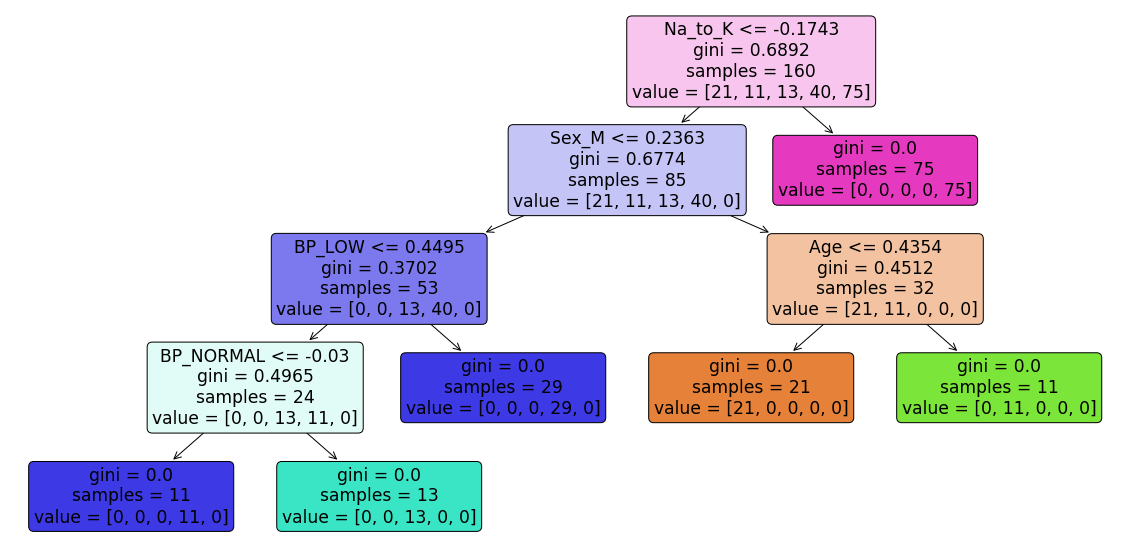

In [92]:
plt.figure(figsize = (20,10))
dec_tree = plot_tree(decision_tree=model_tree, feature_names = df2.columns, filled = True , precision = 4, rounded = True)

##### This tree confirms that Na to K is the  best attribute that separate the data with less entropy, as we have seen above in the statistical part 

97.5


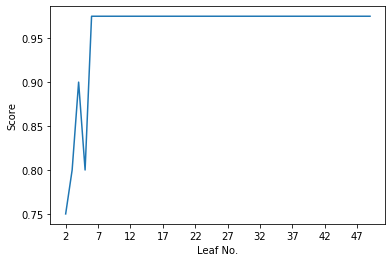

In [39]:
score = []
for i in range (2,50):
    model_tree = DecisionTreeClassifier(max_leaf_nodes=i)
    model_tree.fit(x_train,y_train)
    score.append(model_tree.score(x_test,y_test))

plt.plot(range(2,50),score)
plt.xticks(np.arange(2,50,5))
plt.xlabel('Leaf No.')
plt.ylabel('Score')

print(max(score) * 100)
    
    

97.5


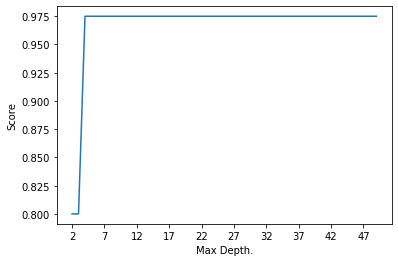

In [40]:
score = []
for i in range (2,50):
    model_tree = DecisionTreeClassifier(max_depth=i)
    model_tree.fit(x_train,y_train)
    score.append(model_tree.score(x_test,y_test))

plt.plot(range(2,50),score)
plt.xticks(np.arange(2,50,5))
plt.xlabel('Max Depth.')
plt.ylabel('Score')

print(max(score) * 100)
    

97.5


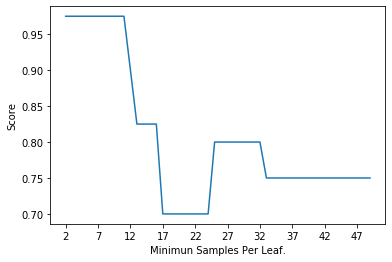

In [41]:
score = []
for i in range (2,50):
    model_tree = DecisionTreeClassifier(min_samples_leaf=i)
    model_tree.fit(x_train,y_train)
    score.append(model_tree.score(x_test,y_test))

plt.plot(range(2,50),score)
plt.xticks(np.arange(2,50,5))
plt.xlabel('Minimun Samples Per Leaf.')
plt.ylabel('Score')

print(max(score) * 100)
    

##### We got an accuracy of 97% for the decision tree  model , because there is no much difference between train and test accuracy so our model performing well 

##### Best min samples leaf for the model is 2 to 8, for accuracy 97.5%
##### Best max_leaf_nodes is 7, for accuracy 97.5%
##### Best max_depth is 7, for accuracy 97.5%

## RandomForest

In [42]:
model_forest1 = RandomForestClassifier()

In [43]:
model_forest1.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
y_train_pred1 = model_forest1.predict(x_train)
y_test_pred_forest1 = model_forest1.predict(x_test)

In [45]:
train_acc1 = accuracy_score(y_train,y_train_pred1)
test_acc_forest1 = accuracy_score(y_test,y_test_pred_forest1 )
print('Training score is ', train_acc1)
print('Test score is ', test_acc_forest1)

Training score is  1.0
Test score is  0.975


In [47]:
model1_forest_f1 = f1_score(y_test,y_test_pred_forest1,average='weighted')
print('F1 Score = ',model1_forest_f1)

F1 Score =  0.9761111111111112


#### Using GridSearchCV

In [49]:
model_forest2 = RandomForestClassifier(random_state=42)

In [50]:
grid = {'n_estimators': np.arange(1, 100), 'criterion':['gini','entropy']}
accuracies = cross_val_score(model_forest2,x_train,y_train,cv=5)

model_forest2 = GridSearchCV(model_forest2, grid, cv=5)
model_forest2.fit(x_train, y_train)

print("Hyperparameters Used:", model_forest2.best_params_)
print("Train Score:", np.mean(accuracies))
print("Test Score:", model_forest2.score(x_test, y_test))

Hyperparameters Used: {'criterion': 'gini', 'n_estimators': 24}
Train Score: 0.9875
Test Score: 0.975


In [51]:
y_pred_forest2 = model_forest2.predict(x_test)

In [52]:
model2_forest_f1 = f1_score(y_test,y_pred_forest2,average='weighted')
print('F1 Score = ',model2_forest_f1)

F1 Score =  0.9761111111111112


##### After using Grid search for random forest model we got also 97.5% testing accuracy 

In [53]:
print(classification_report(y_test,y_pred_forest2 ))

              precision    recall  f1-score   support

           a       0.67      1.00      0.80         2
           b       1.00      0.80      0.89         5
           c       1.00      1.00      1.00         3
           x       1.00      1.00      1.00        14
           y       1.00      1.00      1.00        16

    accuracy                           0.97        40
   macro avg       0.93      0.96      0.94        40
weighted avg       0.98      0.97      0.98        40



In [54]:
cm_forest=confusion_matrix(y_test,y_pred_forest2)

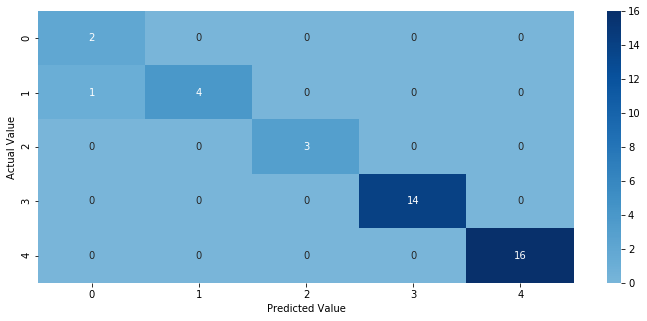

In [55]:
plt.figure(figsize=(12,5))
sns.heatmap(cm_forest,center=True,cmap='Blues',annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value');

C:\Users\muham\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


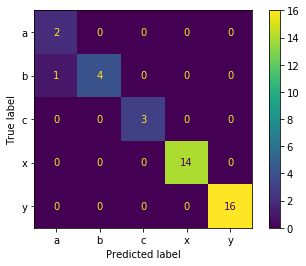

In [56]:
plot_confusion_matrix(model_forest1,x_test,y_test);

## Naive Bayes

In [57]:
model_naive = GaussianNB()

In [58]:
model_naive .fit(x_train,y_train)

GaussianNB()

In [59]:
score_train = model_naive.score(x_train,y_train)
score_train

0.7

In [60]:
score_test_naive = model_naive .score(x_test,y_test)
score_test_naive

0.7

In [61]:
y_pred = model_naive .predict(x_test)

In [62]:
cm = confusion_matrix(y_test,y_pred)
cm 

array([[ 2,  0,  0,  0,  0],
       [ 1,  4,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0, 14,  0],
       [ 4,  1,  3,  3,  5]], dtype=int64)

Text(87.0, 0.5, 'Actual Value')

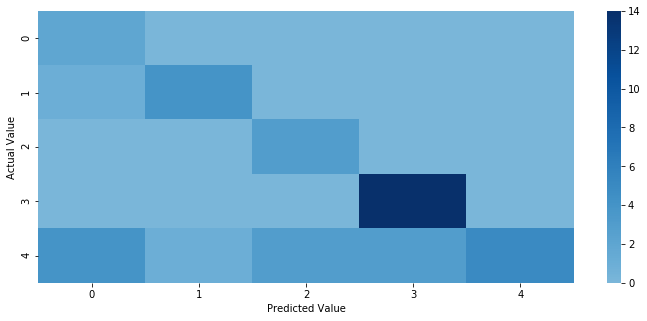

In [118]:
plt.figure(figsize=(12,5))
sns.heatmap(cm,center=True,cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

## KNeighbors

In [63]:
kn_model = KNeighborsClassifier(n_neighbors=3)

In [64]:
kn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
y_pred_knn = kn_model.predict(x_test)

In [66]:
score_train = kn_model.score(x_train,y_train)
score_test_kn = kn_model.score(x_test,y_test)
score_train, score_test_kn

(0.95, 0.875)

In [67]:
knn_acc = accuracy_score(y_pred_knn,y_test)
print('The KNN model Accuracy is', knn_acc*100, "%")

The KNN model Accuracy is 87.5 %


##### accuracy of nearest neighbors model is 90%

87.5


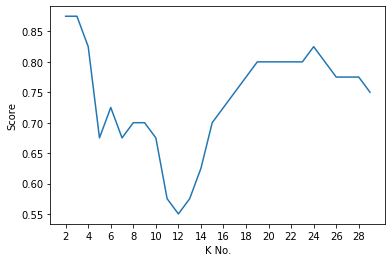

In [68]:
scores = []
for i in range(2,30):
    kn_model = KNeighborsClassifier(n_neighbors=i)
    kn_model.fit(x_train,y_train)
    scores.append(kn_model.score(x_test,y_test))
    
    
plt.plot(range(2,30),scores)
plt.xticks(np.arange(2,30,2))
plt.xlabel('K No.')
plt.ylabel('Score')

print(max(scores) * 100)
    
    
    

##### Highest score is 90% at k = 3

# SVM

In [69]:
svc_model = SVC()

In [70]:
svc_model.fit(x_train,y_train)

SVC()

In [71]:
y_pred = svc_model.predict(x_test)

In [72]:
score_train_svc = svc_model.score(x_train,y_train)
score_test_svc = svc_model.score(x_test,y_test)
score_train_svc, score_test_svc

(0.94375, 0.9)

##### Accuracy of SVC model is 90%

# XGBoost

In [82]:
from xgboost import XGBClassifier

In [93]:
xgb_mod = XGBClassifier()
xgb_mod.fit(x_train,y_train)
preds = xgb_mod.predict(x_test)

xgb_acc = accuracy_score(y_test,preds)
xgb_acc




[17:09:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\muham\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.975

## Plotting All Accuracies 

In [94]:
acc_df = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNeighbors','SVM','XGBoost'],
            'Accuracy':[acc_log,test_acc_tree,test_acc_forest1,score_test_naive,score_test_kn,score_test_svc,xgb_acc]})

In [95]:
acc_df

,Model,Accuracy
0,Logistic Regression,0.900
1,Decision Tree,0.975
2,Random Forest,0.975
3,Naive Bayes,0.700
4,KNeighbors,0.875
5,SVM,0.900
6,XGBoost,0.975


##### Sorting the accuracy values Descending order

In [96]:
accuracy_df = acc_df.sort_values('Accuracy',ascending=False)
accuracy_df

,Model,Accuracy
1,Decision Tree,0.975
2,Random Forest,0.975
6,XGBoost,0.975
0,Logistic Regression,0.900
5,SVM,0.900
4,KNeighbors,0.875
3,Naive Bayes,0.700


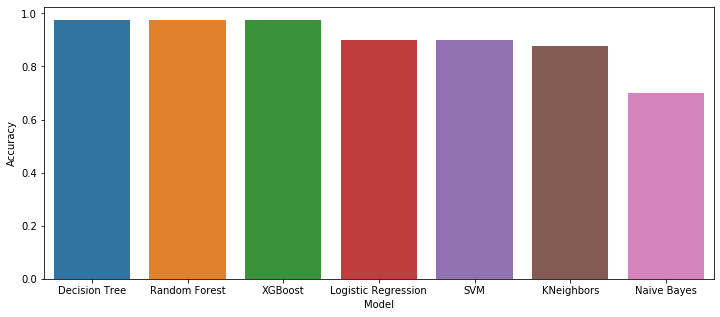

In [98]:
plt.figure(figsize=(12,5))
sns.barplot(data=accuracy_df,x='Model',y='Accuracy');

# Conclusion 

> 1. The average age using drug (B) is the highest, and drug(A) used by the least age average among dataset  
> 2.  we can see that Y and X drug are the most used for both M&F, because Y and X are the most dominant.However, Males count using drug A are higher than Females using the same drug.
> 3. Y drug is the most dominant drug in the dataset followed by X drug 
> 4.  Male proportion slightly higher than female in the dataset 
> 5. With normal BP the most used drugs are X & Y respectively, with high BP Drug B is involved, and with Low BP Drug C is involved
> 6. We can see that Drug C is used for the high Cholesterol patients besides all the other Drugs with different percentages 
> 7. We can confirm from this plot that Males using Drug A more than Females, with slightly different usage for the rest of drugs 
> 8. Normal BP has the lowest average of NA to K, and high BP has the highest average 
> 9. Drug Y is used for patients whose Na to K ratio is higher than 20, other drugs used for patients whose Na to K ratio below 15
 